In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps

In [3]:
lnddir = '/home/kajiyama/H08/H08_20230612/lnd/out'
maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.WFDEI.hlf'
dtype = 'float32' # 4バイト

In [21]:
def worldmap(img):
    projection = ccrs.PlateCarree(central_longitude=0)
    img_extent = (-180, 180, -90, 90)

    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    im = ax.imshow(img,
                   origin='upper',
                   extent=img_extent,
                   transform=projection,
                   cmap='GnBu',
                   vmin=0, vmax=1e-2)
    fig.colorbar(im, ax=ax, orientation='horizontal')

In [27]:
SUF='.hlf'
hlfshape = (360, 720)
gl5shape = (2160, 4320)
supagr = lnddir + f"/SupAgr__/W5E5LECD20190000{SUF}"
data = np.fromfile(supagr, dtype=dtype)
lonlat = data.reshape(hlfshape)
lonlat = np.ma.masked_where(lonlat>1e19, lonlat)
print(np.sum(lonlat))

33561336.0


In [ ]:
supagr = lnddir + f"/SupAgr__/W5E5LECD20190000{SUF}"
data = np.fromfile(supagr, dtype=dtype)
lonlat = data.reshape(hlfshape)
lonlat = np.ma.masked_where(lonlat>1e19, lonlat)
print(np.sum(lonlat))
worldmap(lonlat)

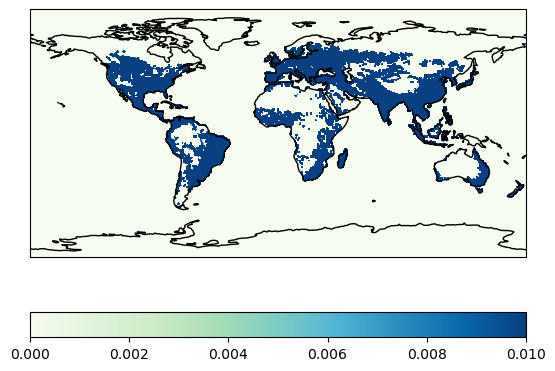

In [ ]:
worldmap(lonlat)

In [22]:
demagr = lnddir + "/SupAgrR_/W5E5LECD20190000.gl5"
data = np.fromfile(demagr, dtype=dtype)
lonlat = data.reshape(2160, 4320)
lonlat = np.ma.masked_where(lonlat>1e19, lonlat)
print(np.sum(lonlat))

145082060.0


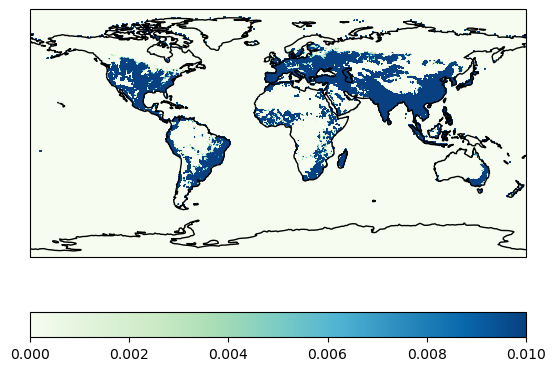

In [23]:
worldmap(lonlat)

In [68]:
def monthly(year = 2011):
    raindir = '/home/kajiyama/H08/H08_20230612/met/dat/Rainf___'
    maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.WFDEI.hlf'
    dtype = 'float32' # 4バイト
    box = []
    for i in range(1, 13):
        rainpath = raindir + f"/W5E5____{year}{i:02}00.hlf"
        data = np.fromfile(rainpath, dtype=dtype)
        lonlat = data.reshape(360, 720)
        total = np.sum(lonlat)
        box.append(total)
    return box

In [69]:
box = monthly(year=2011)
print(box)

[5.449506, 5.493202, 5.3276534, 5.4639664, 5.5509286, 5.9066763, 6.078797, 6.160935, 5.7836537, 5.4982424, 5.4020777, 5.418675]
